# Backup using Git and GitHub
It's imporant to have a backup of the excercises and projects that you make on the cluster, and you have to setup the backup yourself! Here we'll explain how to use Git to save different versions of your code, and create a repository on GitHub that works as a backup. There are a lot of options that you can change, but we recommend to follow this guide if you're using Git for the first time.

**Setting this up is quite complex, so let us know if you get stuck!**

### First you'll have to create a (free) account on [GitHub](https://github.com/). 
We recommend you to not use your HHS mail account for GitHub, since you'll lose access to this account when you're no longer a student.

### Fill in the user name and mail adress that you used to generate your GitHub account:

In [ ]:
github_user = 'yourname' # replace with the username of your GitHub account
github_mail = 'yourmail@somewhere.com' # replace with the mail that you used

Once you've created an account, you can create a new repository for your code. The repository keeps track of the versions of your code, and it's recommended to create different repositories for different projects/courses.
### click `create new repository` or follow this link: https://github.com/new
Fill in the following things:
- `ds1` at Repository name
- select the `Private` option

Run the following code to see how it should look like.

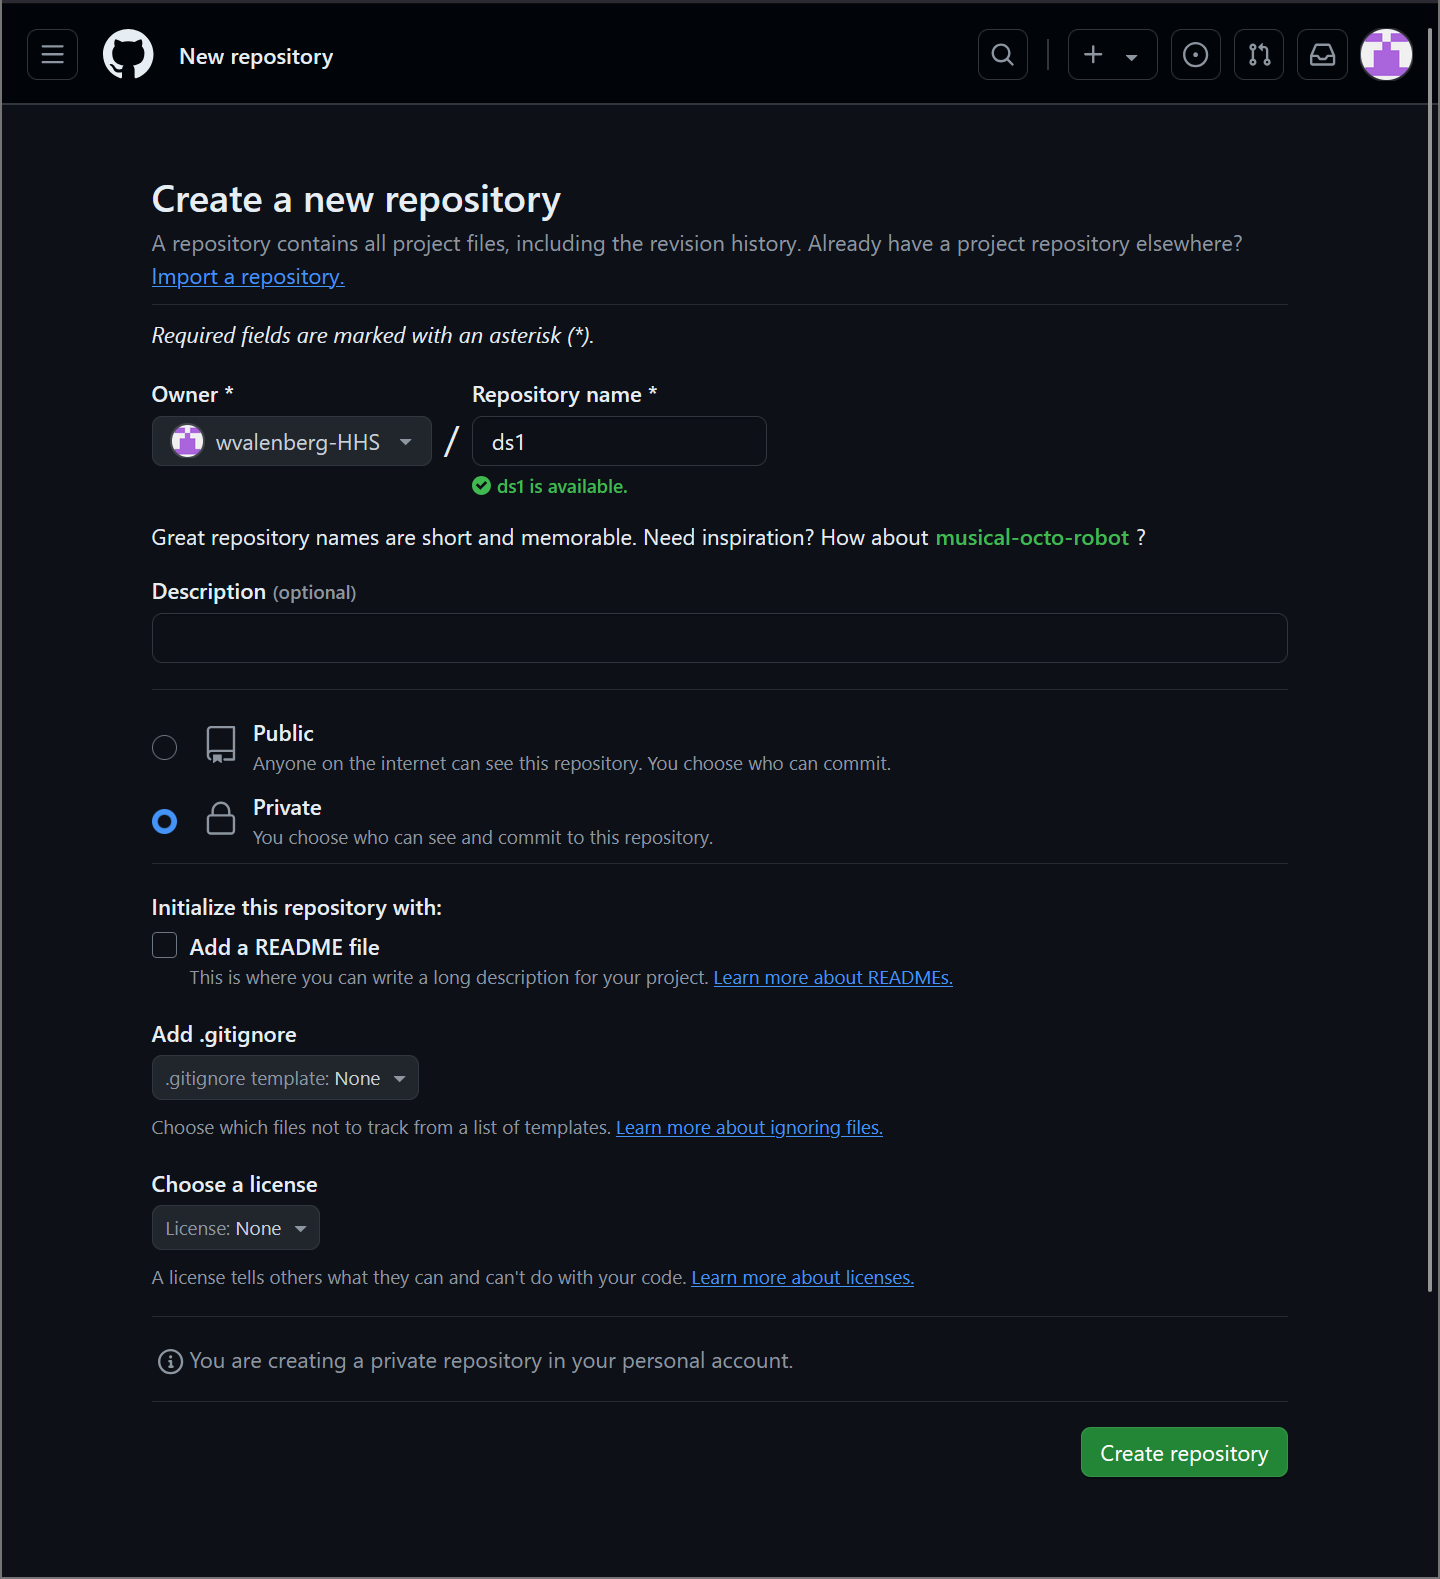

In [113]:
from IPython.display import Image 
Image(data="/data/ds1/datasets/git_tutorial/github_create_repository.png") 

After you click `Create repository`, you should see the following image. The repository is still empty but we're going to send the current version of your code to the repository.

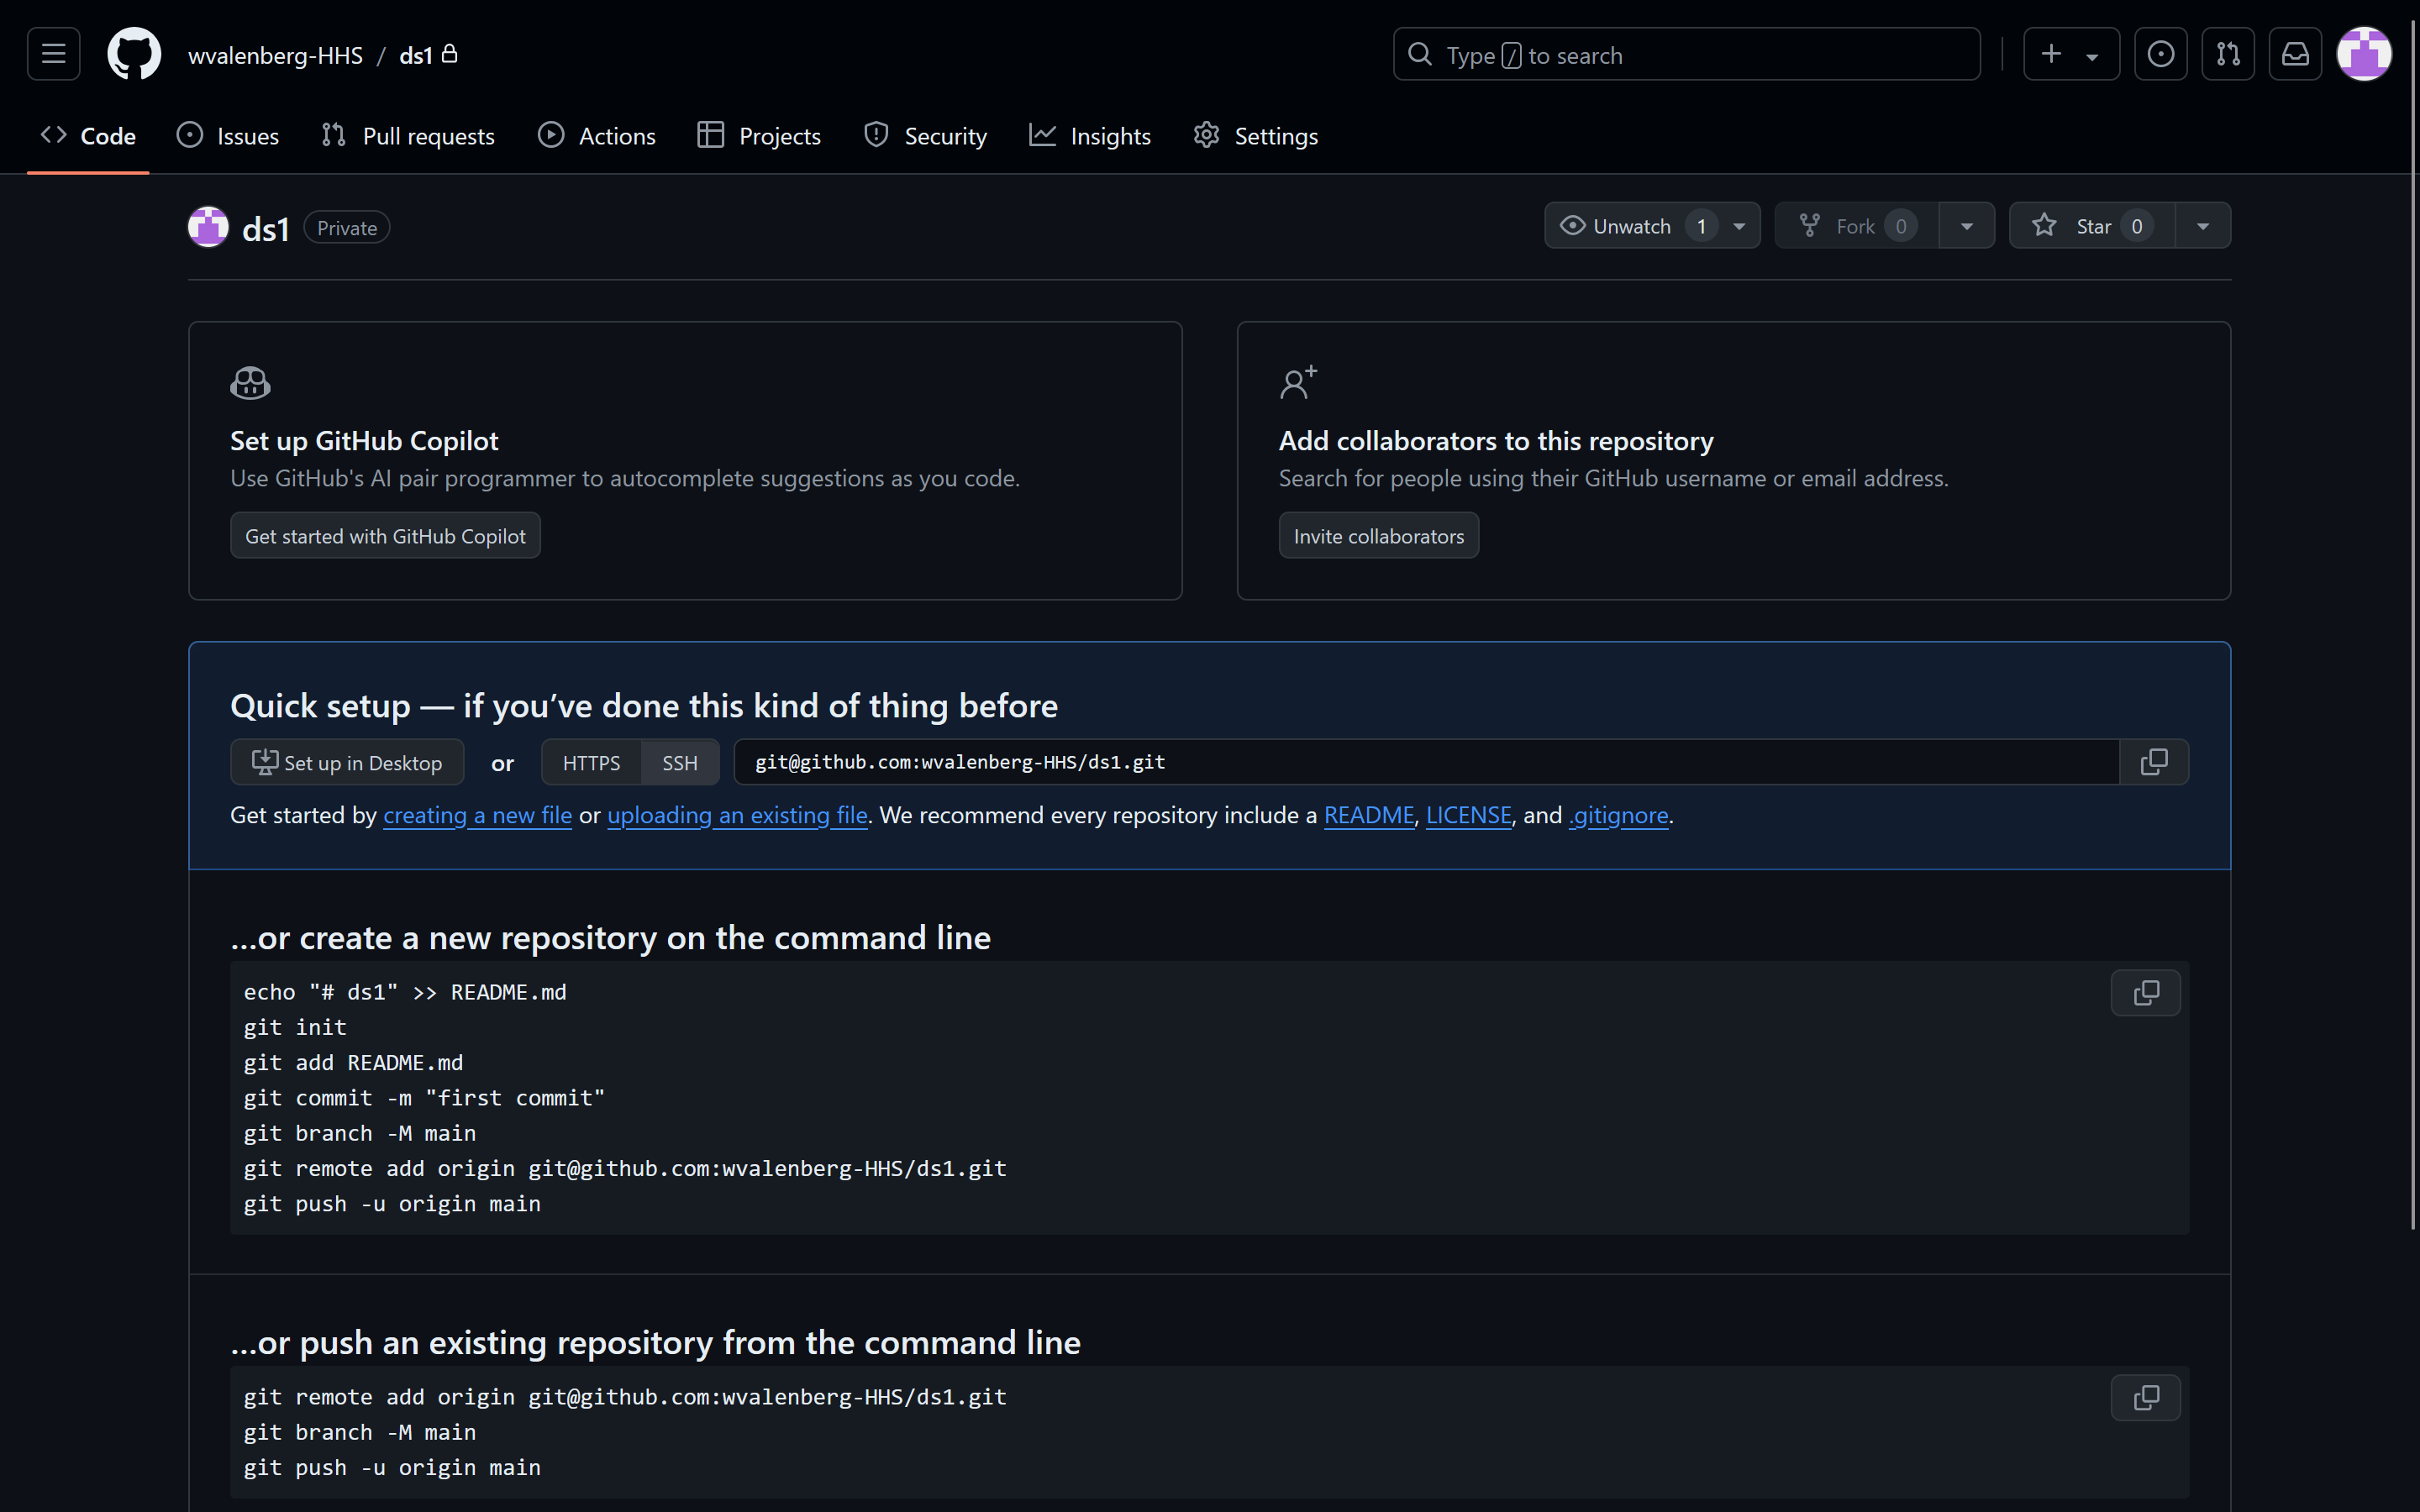

In [115]:
Image(data="/data/ds1/datasets/git_tutorial/github_empty_repository.png") 

Currently, only you can add code to the repository, and when you send your code from the server you should prove to GitHub that the code is yours. This is called "authentication" and there are multiple ways to do this. We recommend using SSH keys, and we'll explain how to set this up.

### Run the code in the next cell

In [ ]:
print(f'ssh-keygen -t ed25519 -C "{github_mail}"')

### Copy the output from the command, open a terminal (at the top of the page: `File -> New -> Terminal`), paste the output, and press ENTER

You will be asked to input a filename and a passphrase, but **leave both empty** and press ENTER.

The program will generate an identification file and a public key file (see image below). When you share the public key with GitHub, than people with the identification file (or *private key*) can access your repositories. **So don't share your private key with others!**

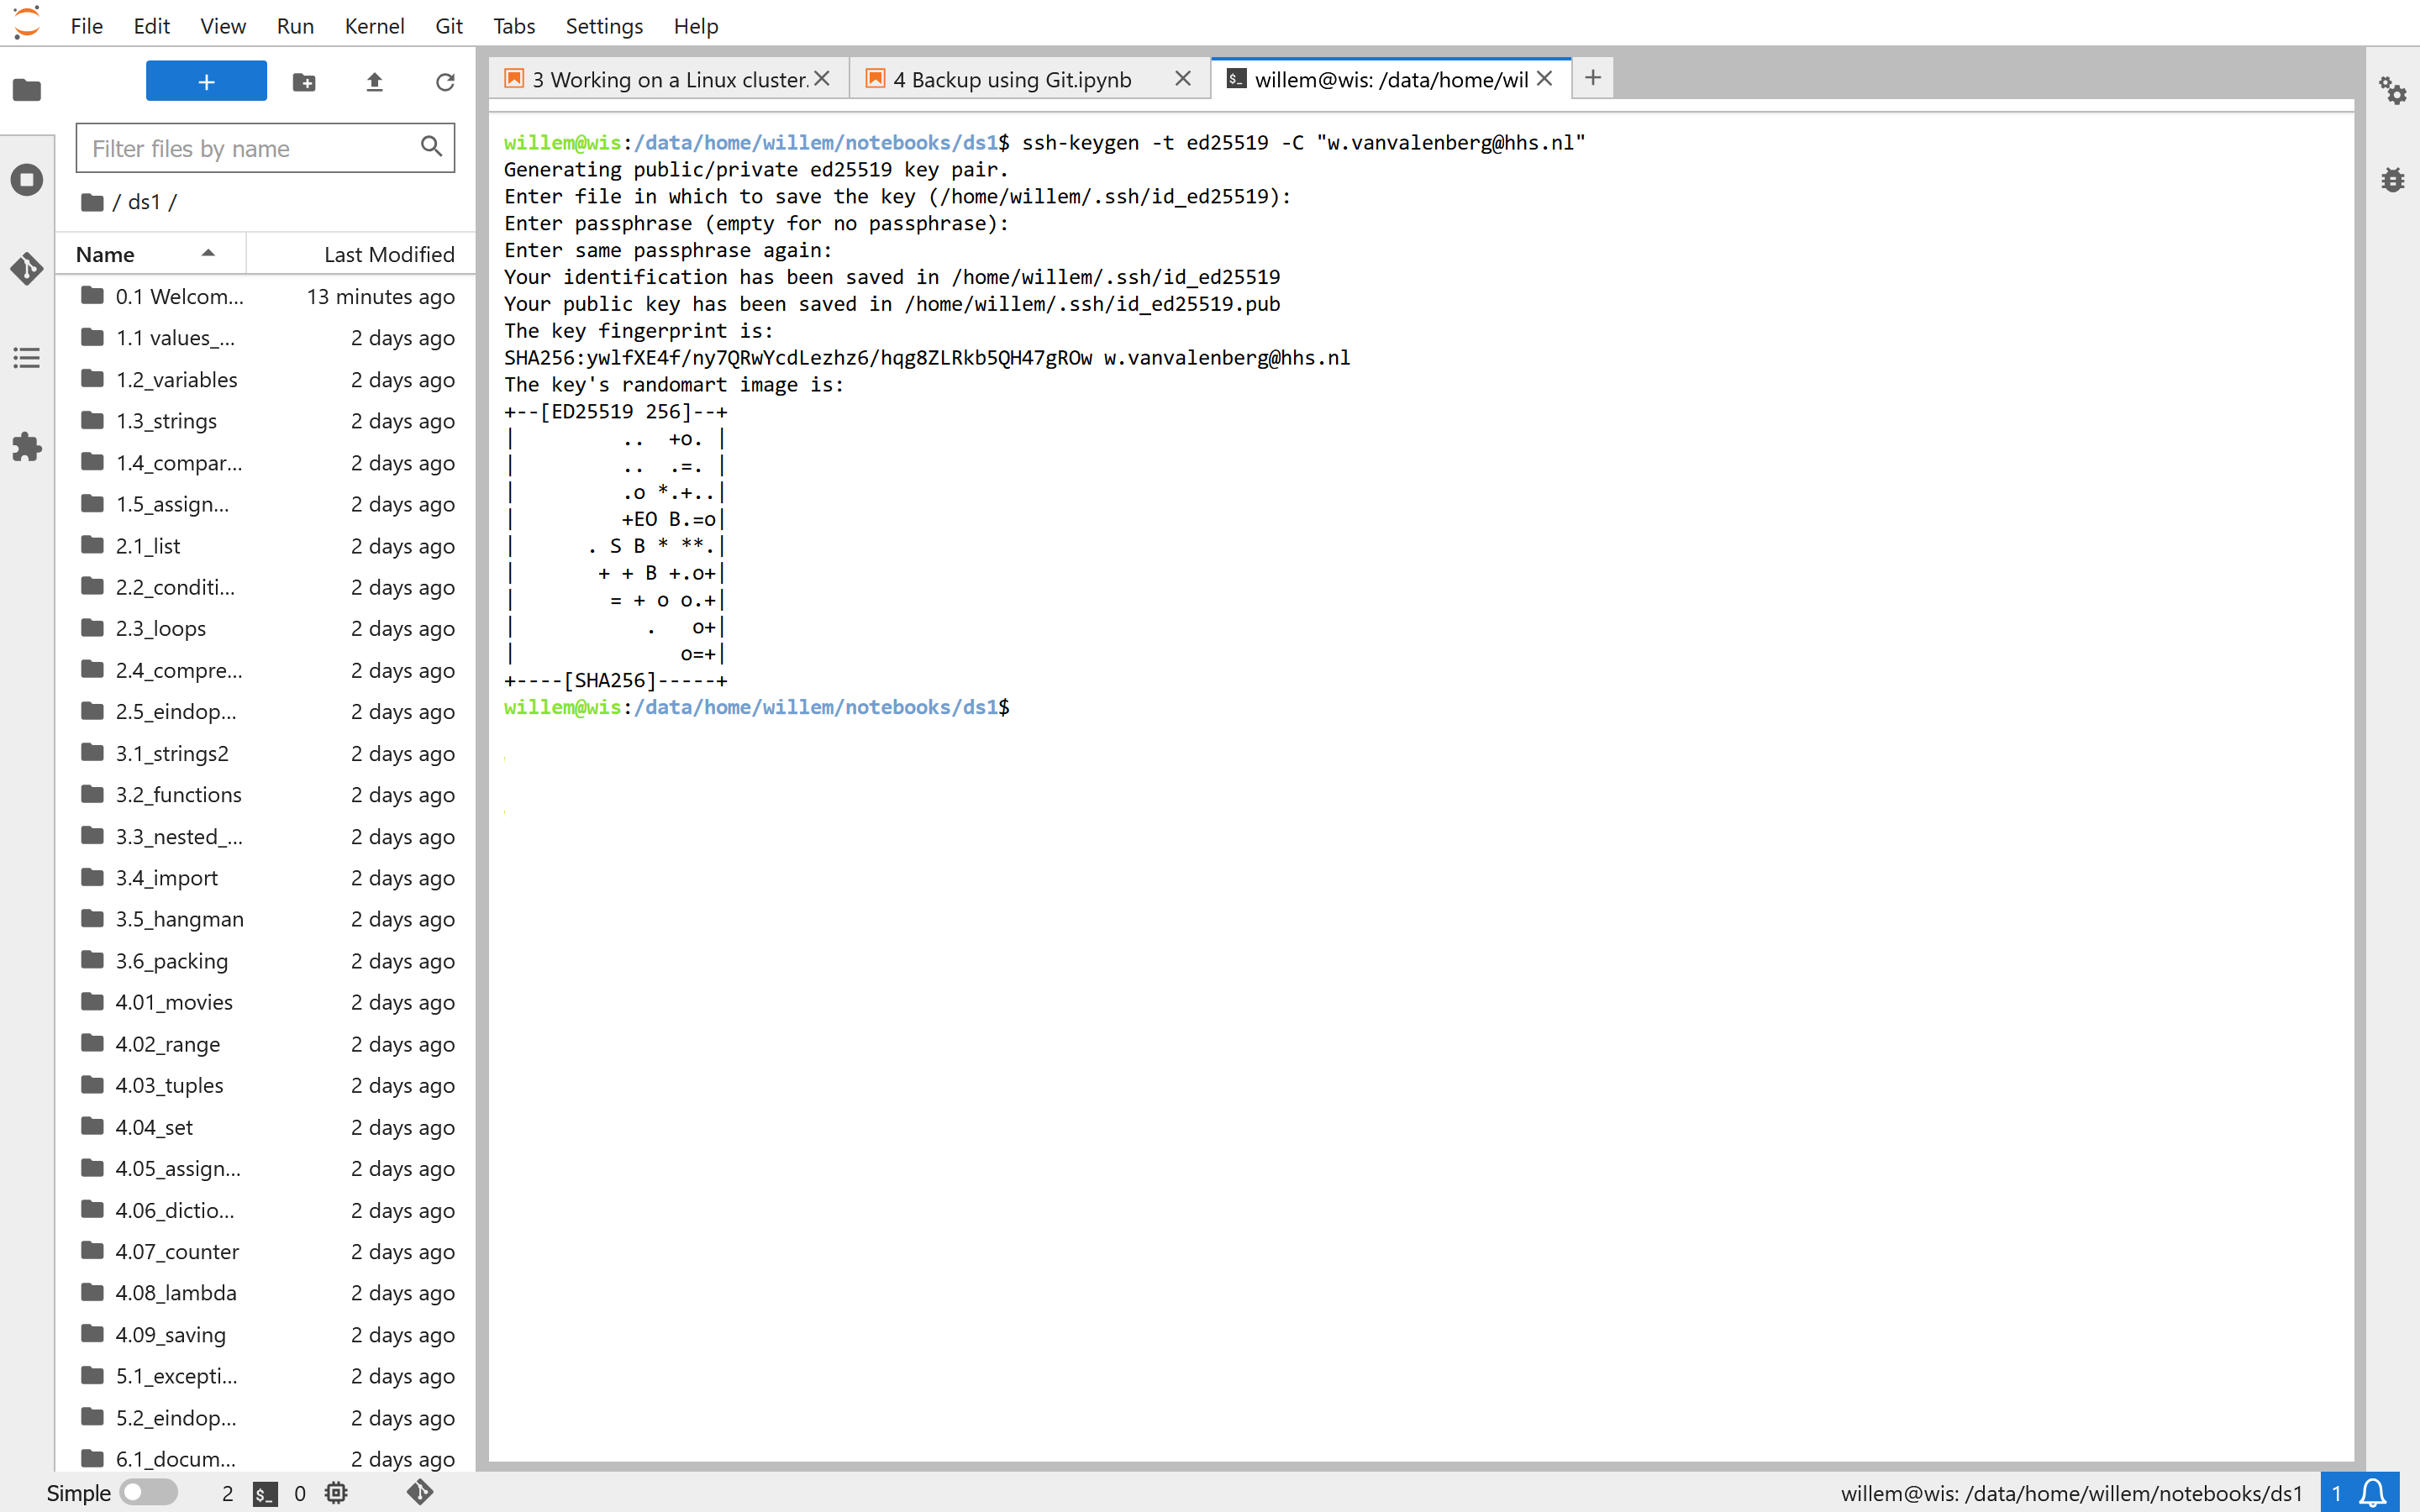

In [117]:
Image(data="/data/ds1/datasets/git_tutorial/github_create_ssh.png") 

### Next run the following cell

In [ ]:
!cat ~/.ssh/id_ed25519.pub

Go back to GitHub by following this link: https://github.com/settings/keys, or clicking on the `top-right icon -> Settings -> SSH Keys -> New SSH key`.

### Fill in the following things:
- the name `wisserver` at `Title`
- copy the line from the previous step (starting with `ssh-ed25519...`) to `Key type`.

and press `Add SSH key`. It should look like the following image:

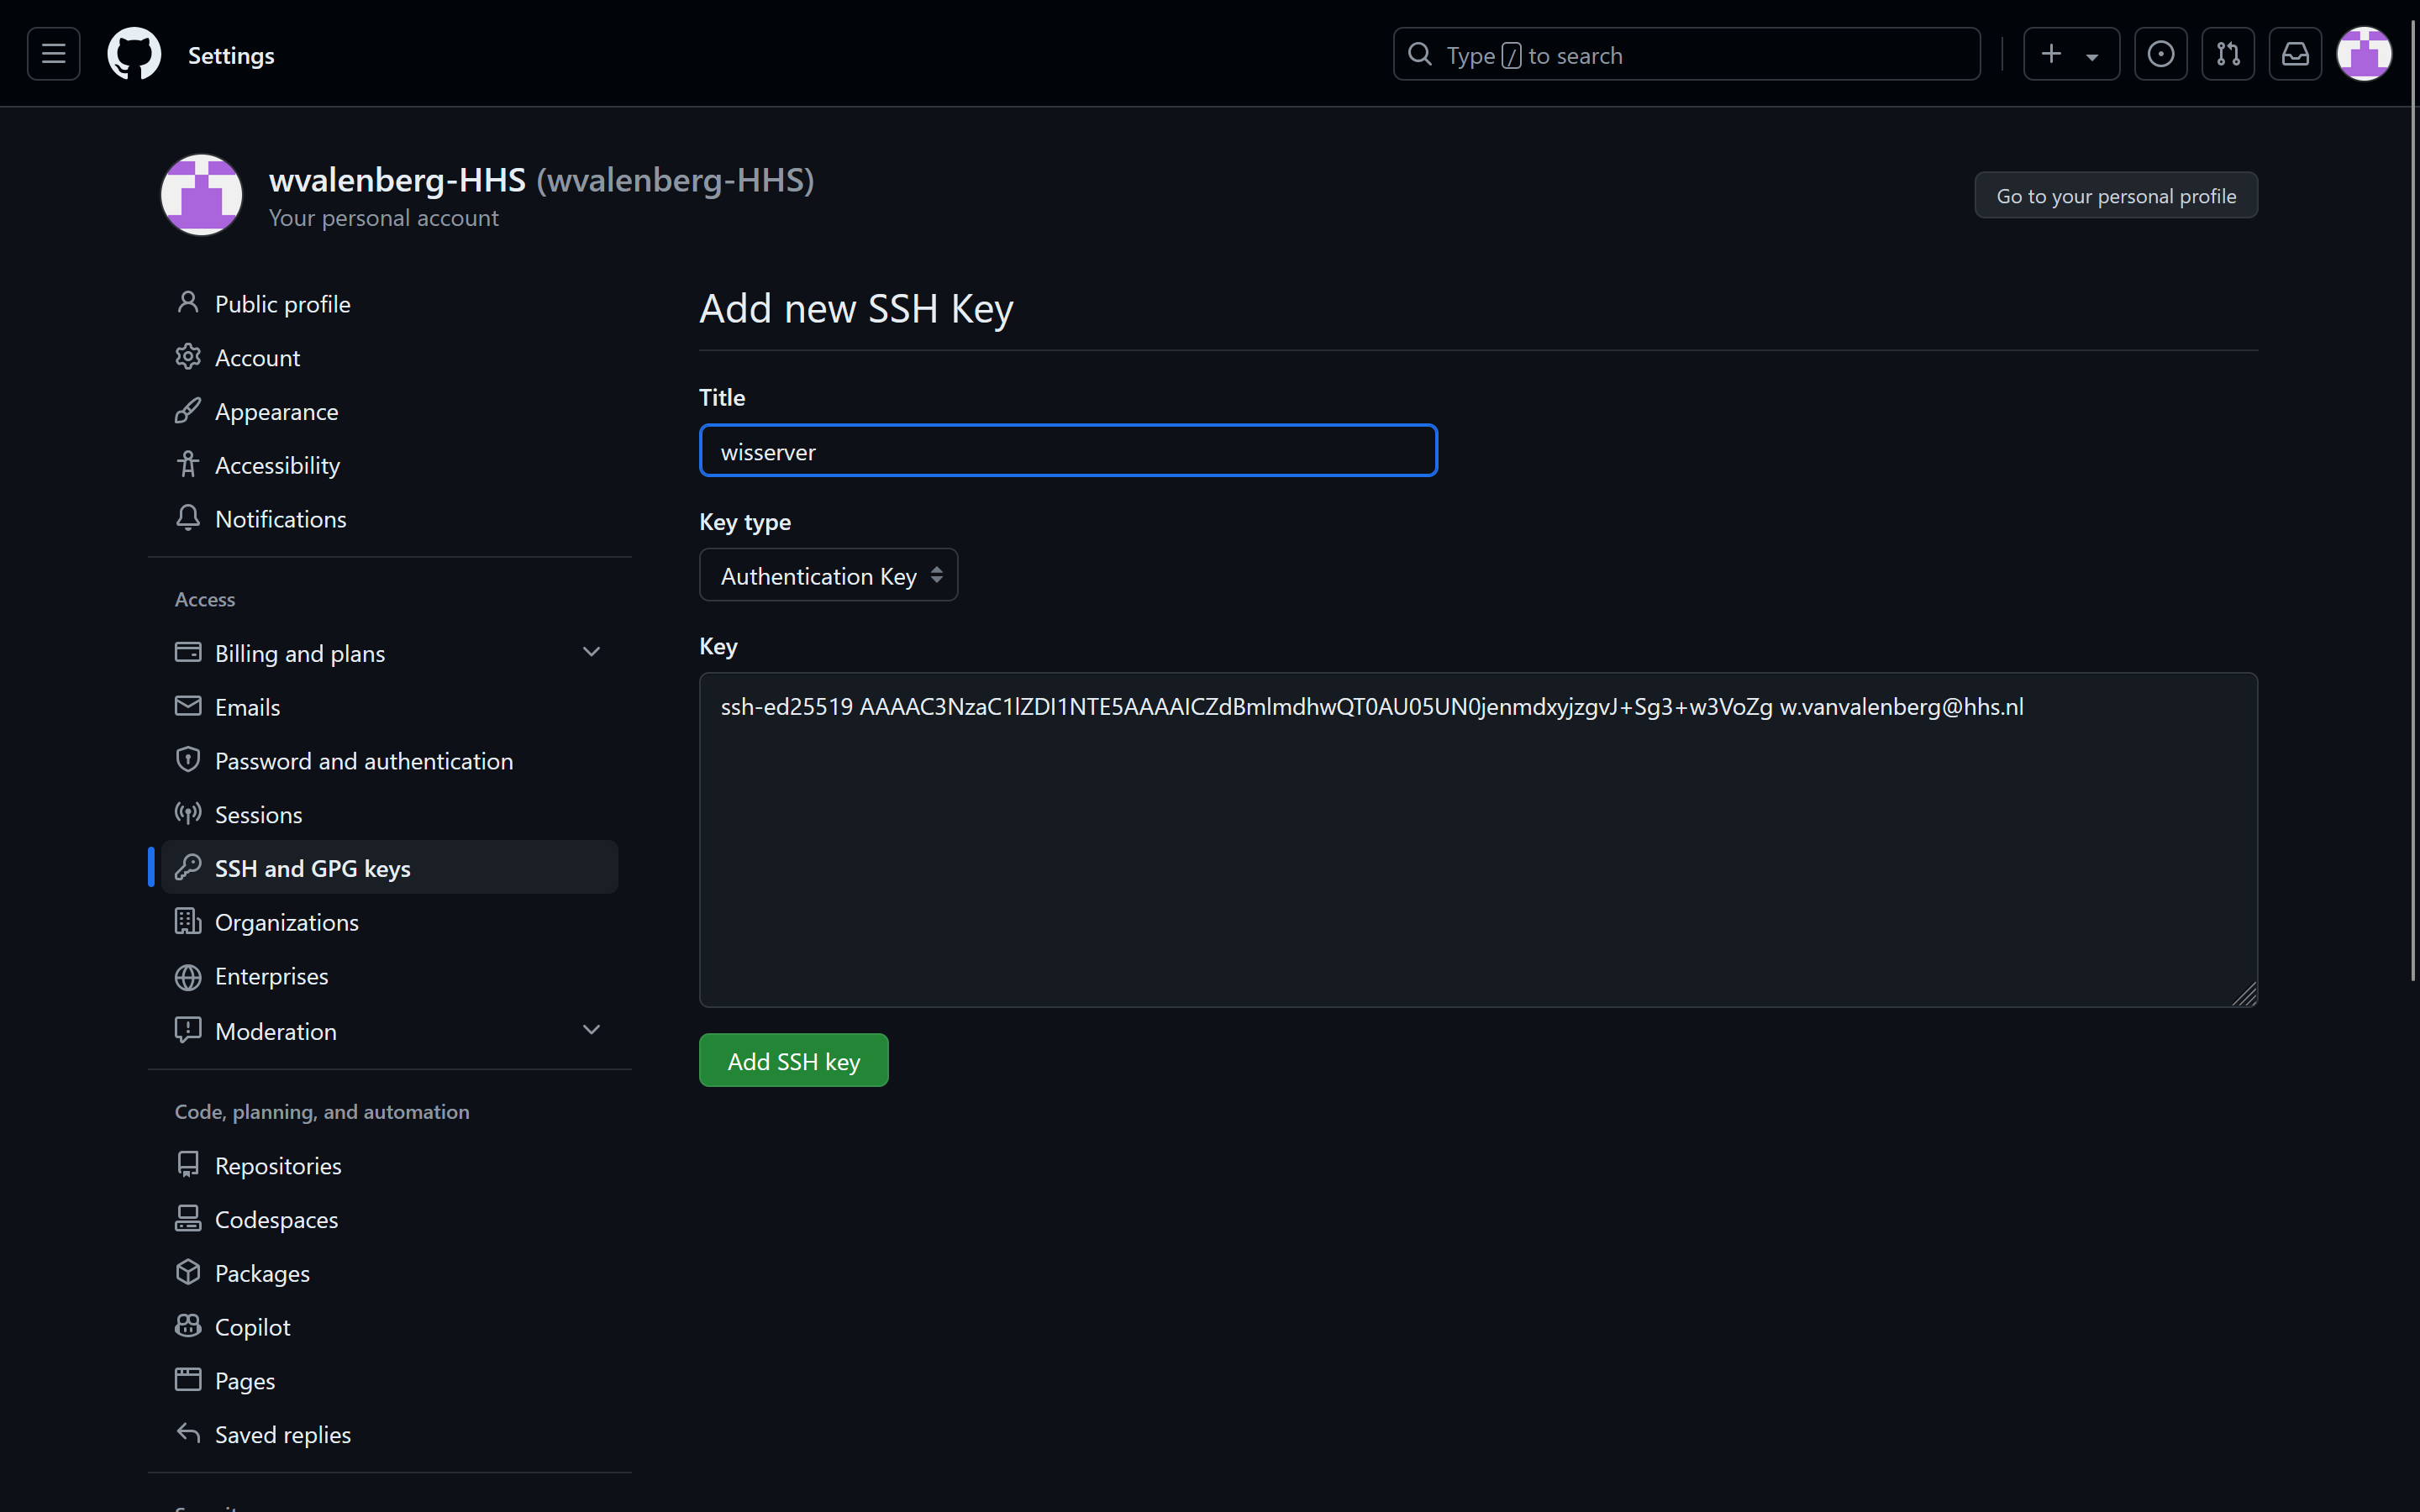

In [119]:
Image(data="/data/ds1/datasets/git_tutorial/github_add_ssh.png") 

#### With this the SSH authentication should work! Test it with the following command

In [ ]:
!ssh -T git@github.com

It should say `You've successfully authenticated, but GitHub does not provide shell access.`.

We need one more step before we can send our code to the repository. 
### Run the following code

In [ ]:
!git config --global user.name {github_user}
!git config --global user.email {github_mail}

### Initialize the repository
**Now ensure that you're in the `ds1` folder**, as in above picture (you can check it in the top-left or bottom-right). 
Click on the third symbol on the left and click `Initialize a Repository`. Run the following code to see the example:

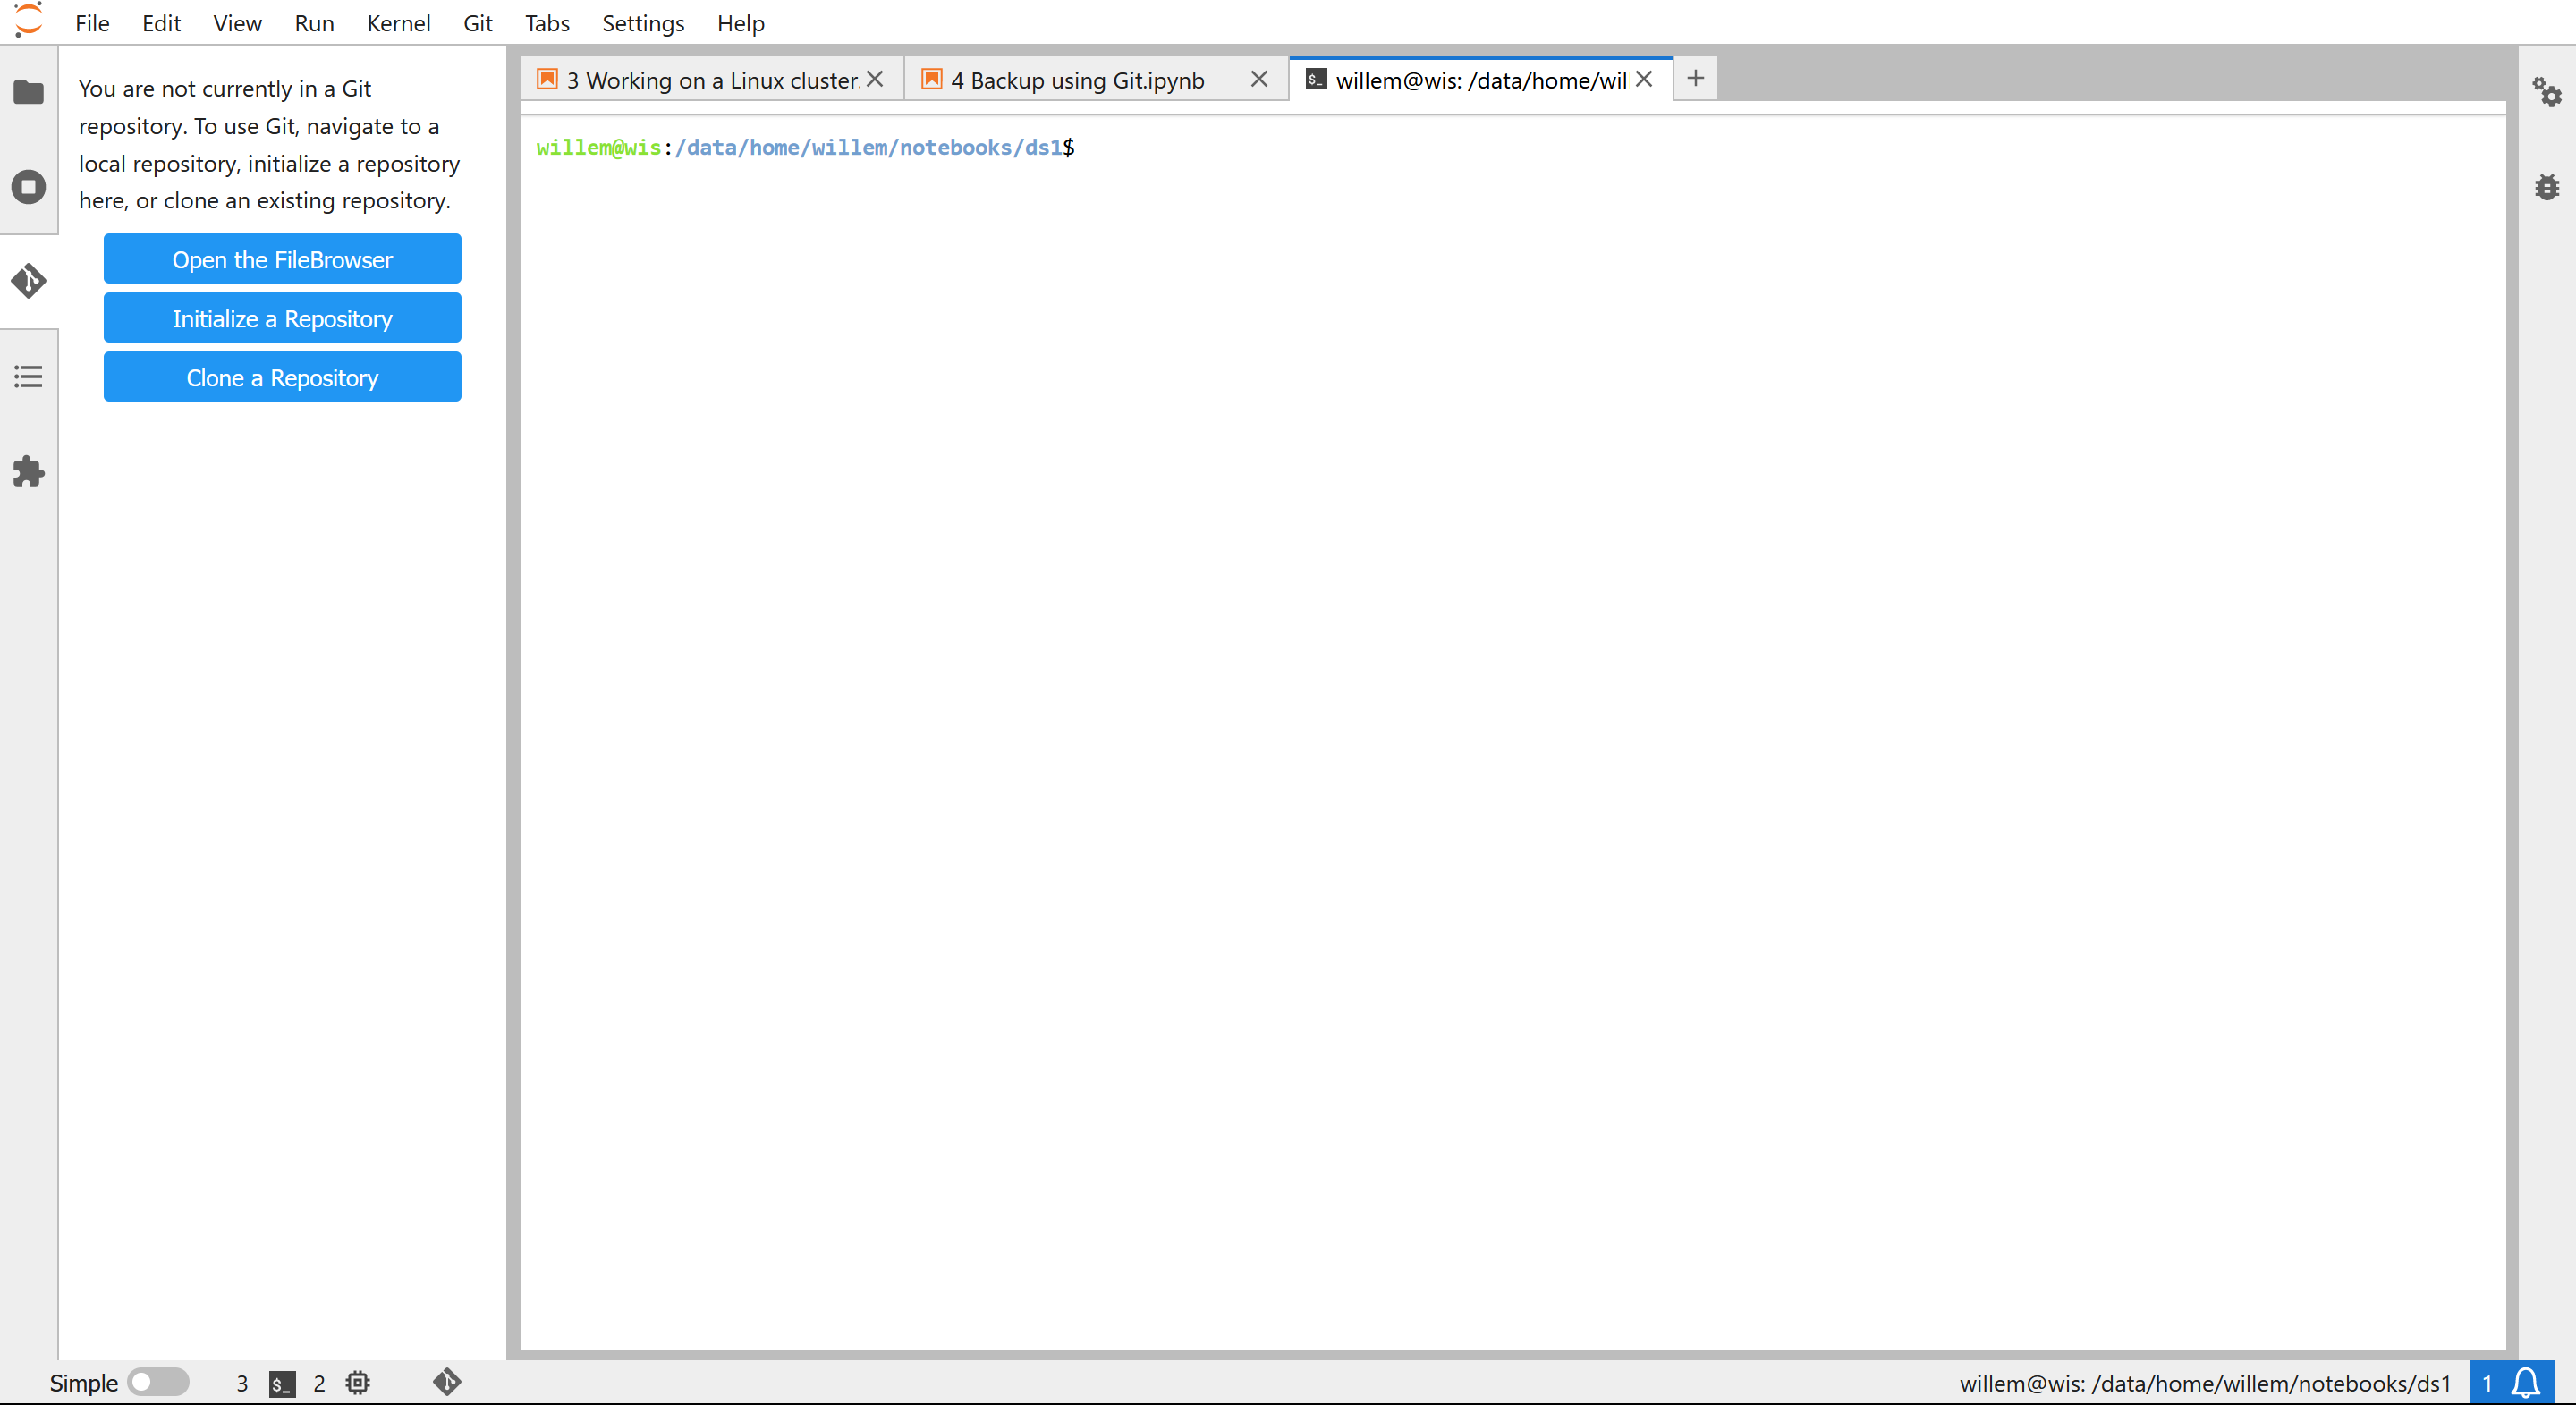

In [124]:
Image(data="/data/ds1/datasets/git_tutorial/git_initialize.png") 

After initializing the repository, link it to your GitHub repository by running the following code:

In [ ]:
%cd ~/notebooks/ds1
!cp /data/ds1/datasets/gitignore_students.txt .gitignore 
!git branch -M main
!git remote add origin git@github.com:{github_user}/ds1.git

### Commit your code to the repository
There should be a list of files on the left of the page, below `Untracked` (see figure below). Press the `+` next to `Untracked` to make all files to be tracked by Git.

Write the message `first commit` in the summary at the bottom. Run the following code to see the example:

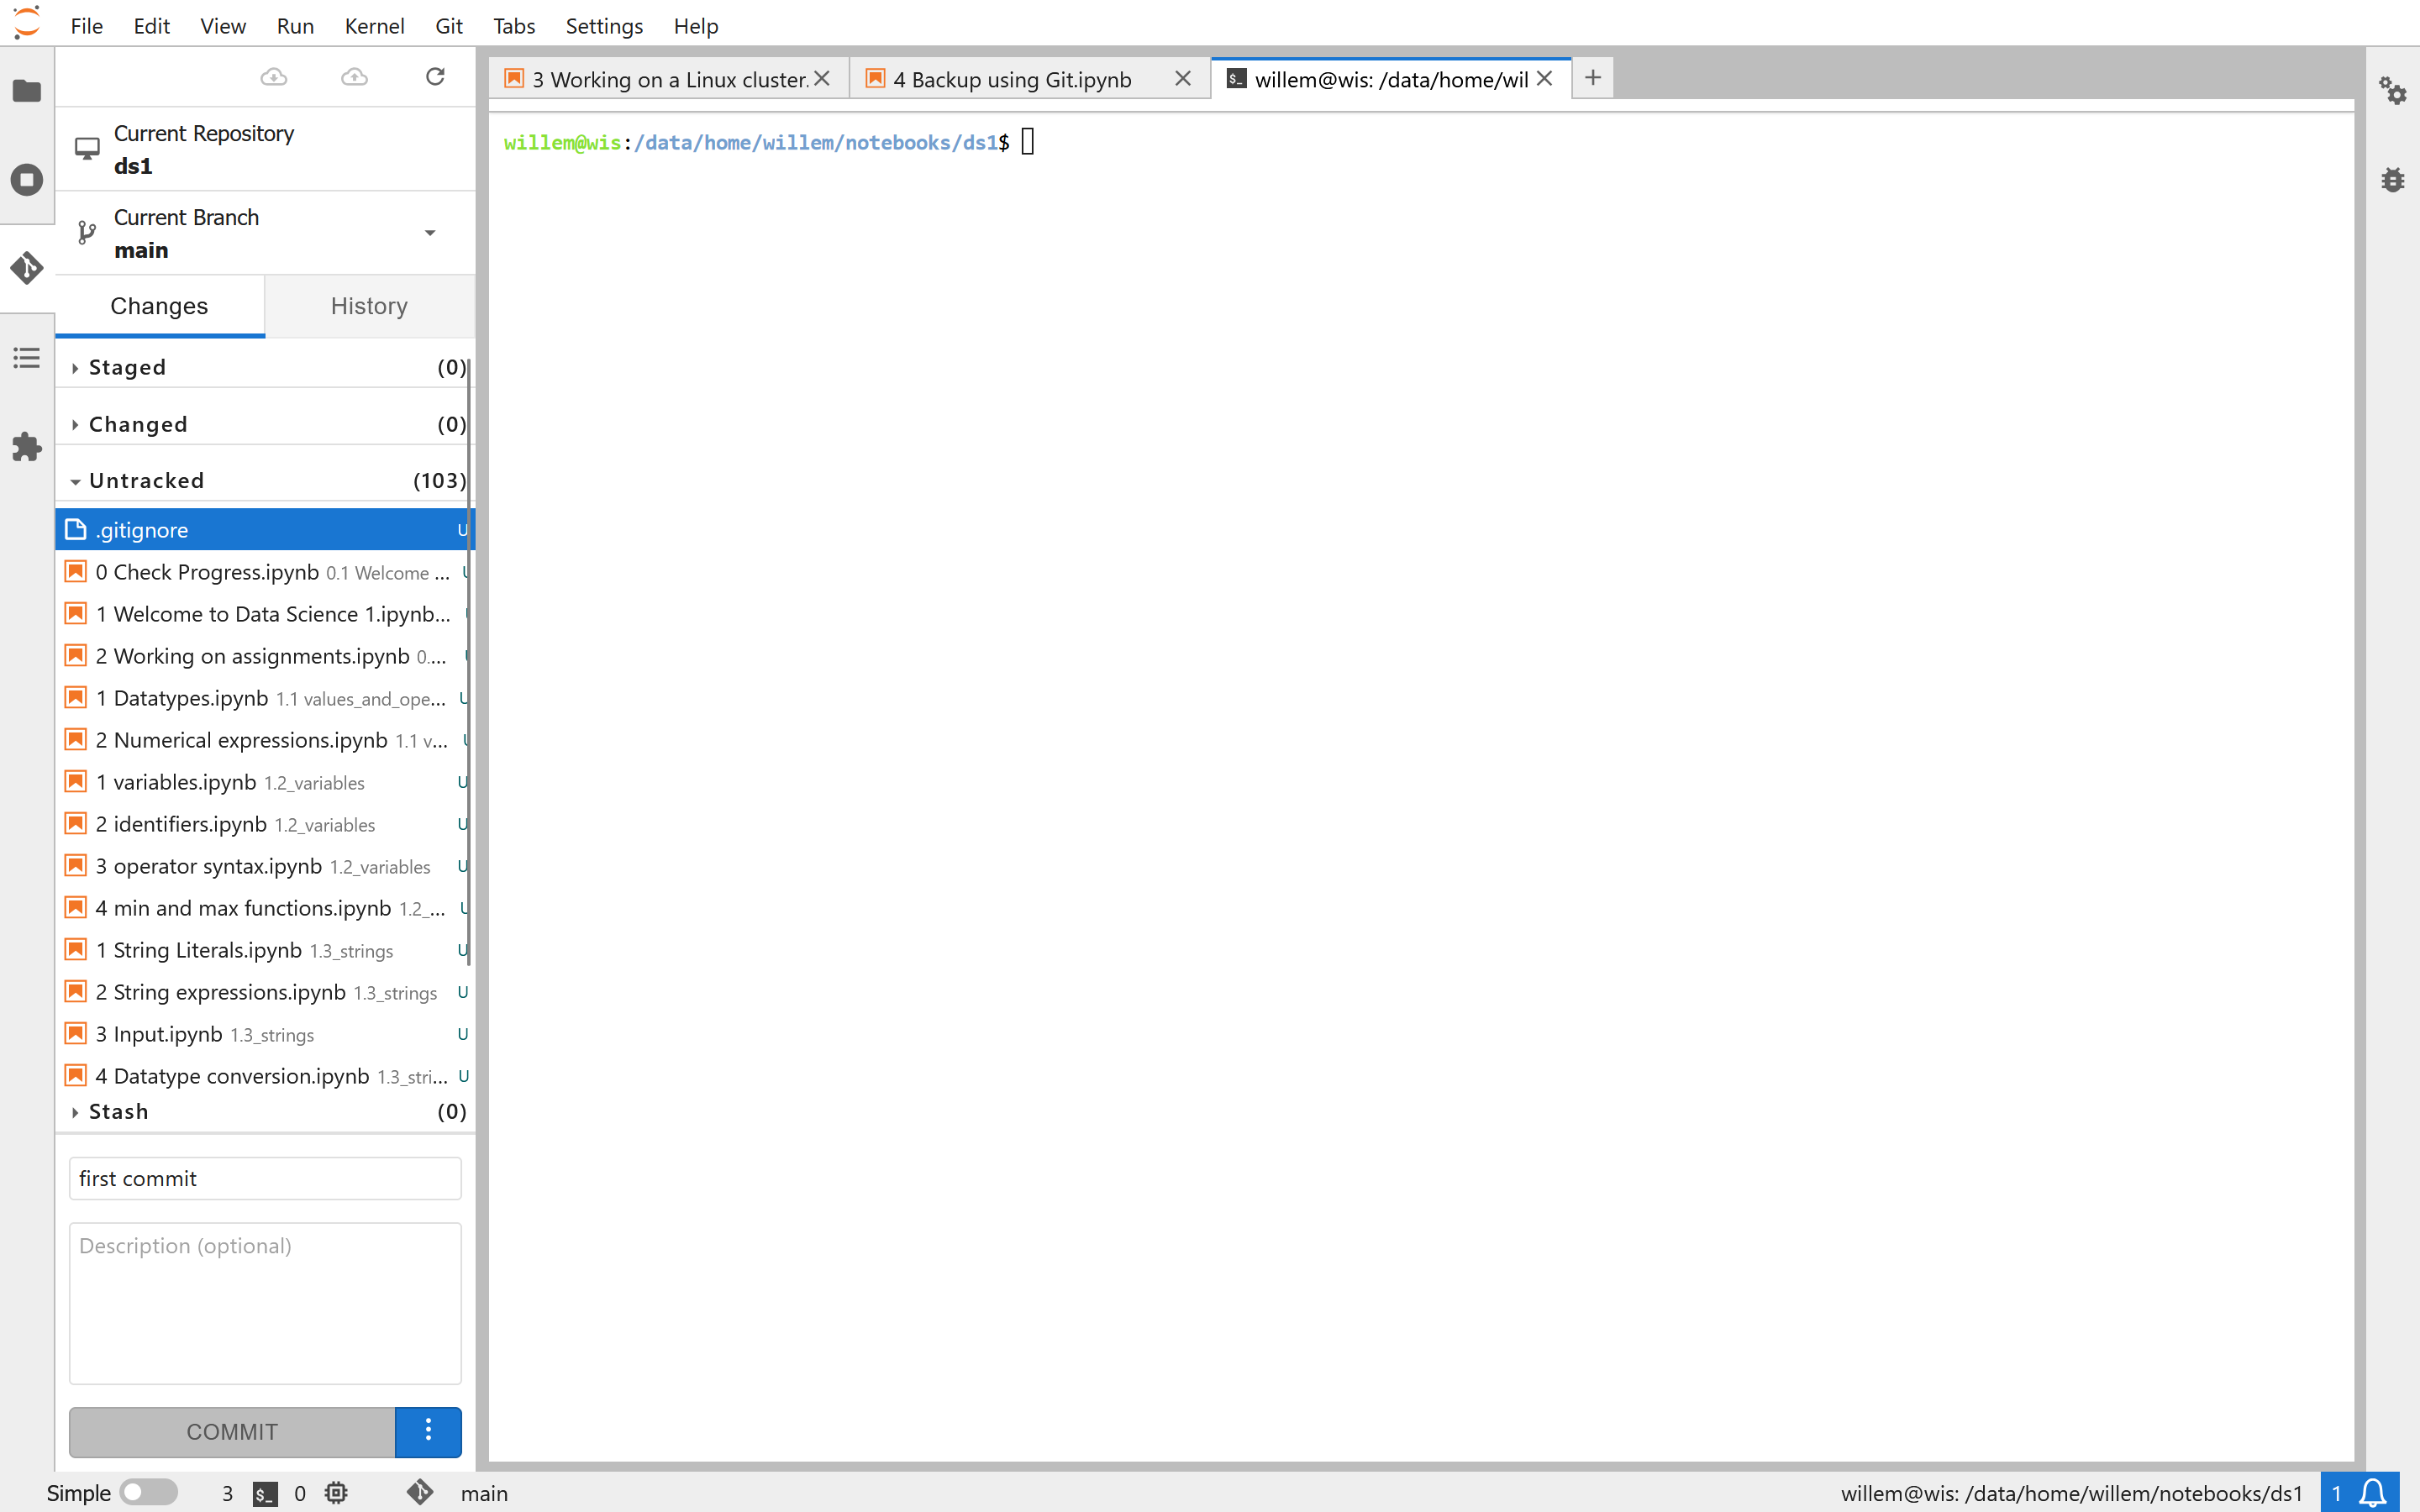

In [125]:
Image(data="/data/ds1/datasets/git_tutorial/git_first_commit.png") 

Press `COMMIT` and the current state of the DS1 excercises is saved in Git. Now we'll have to send it to Github.

Go to the top of the page and press `Git -> Push to Remote`. Run the following code to see the example:

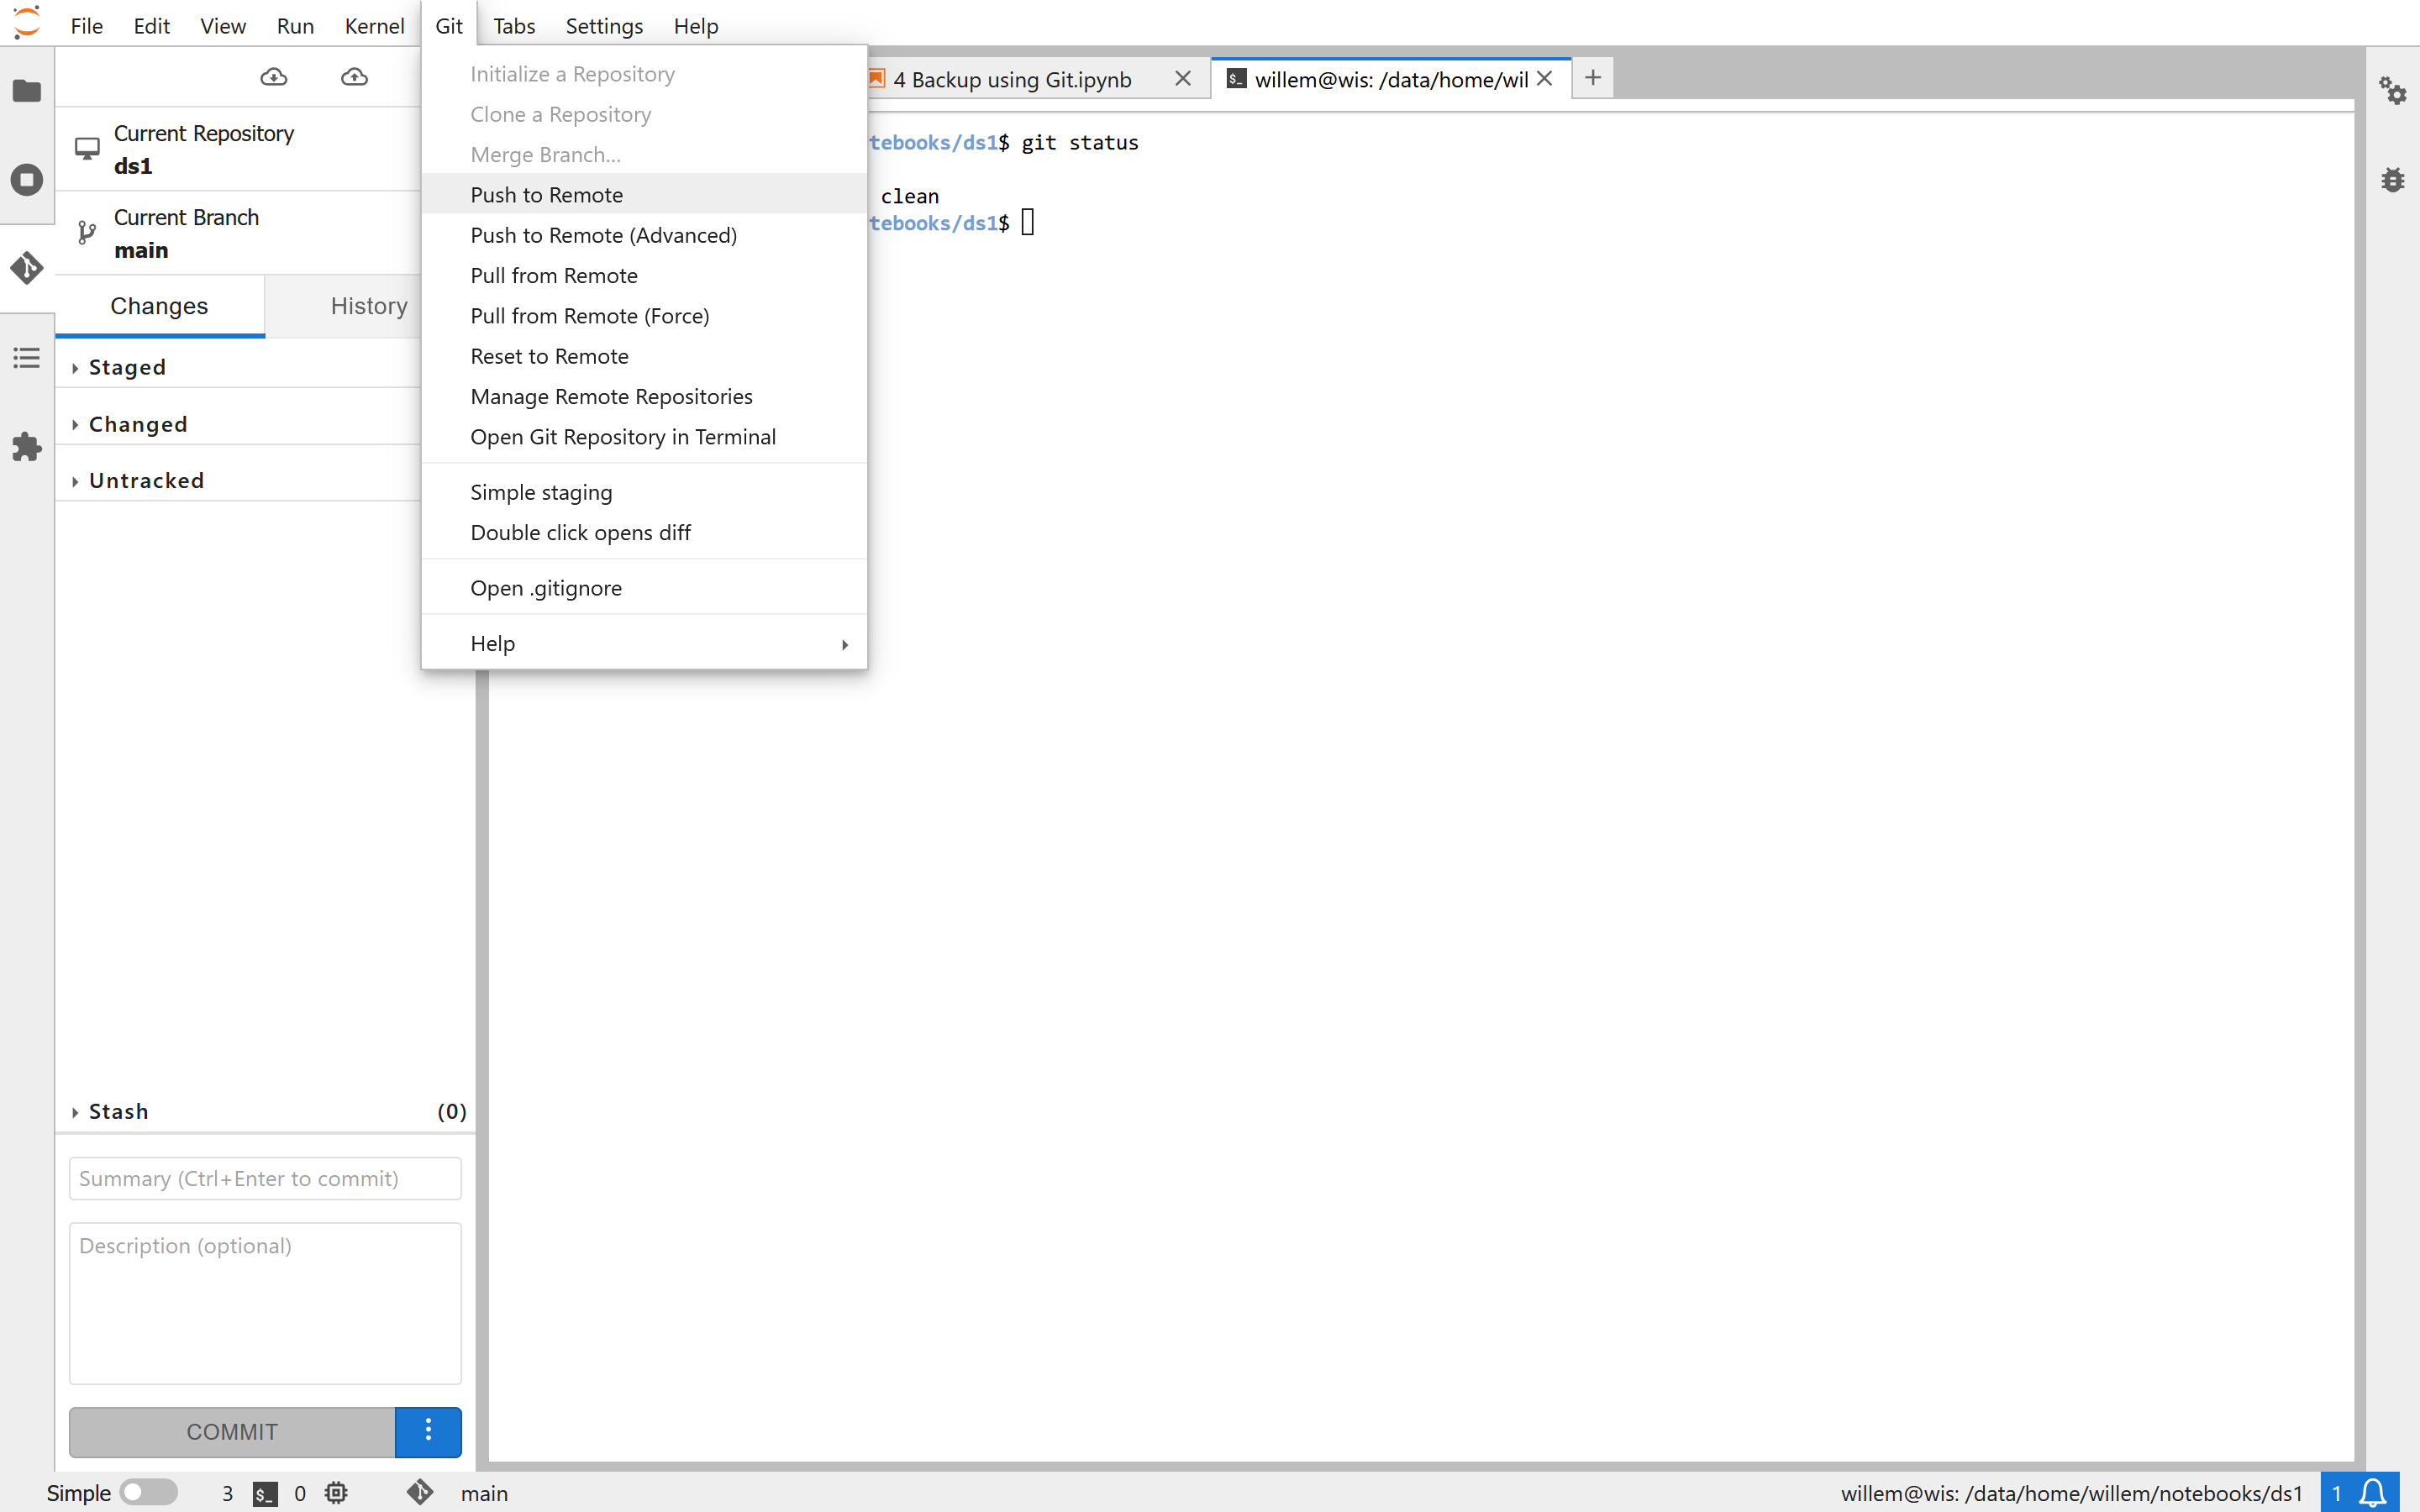

In [127]:
Image(data="/data/ds1/datasets/git_tutorial/git_push.png") 

If the push was successful, the code should now be present in your repository on GitHub! Reload your GitHub repository, and it should look like the image below.

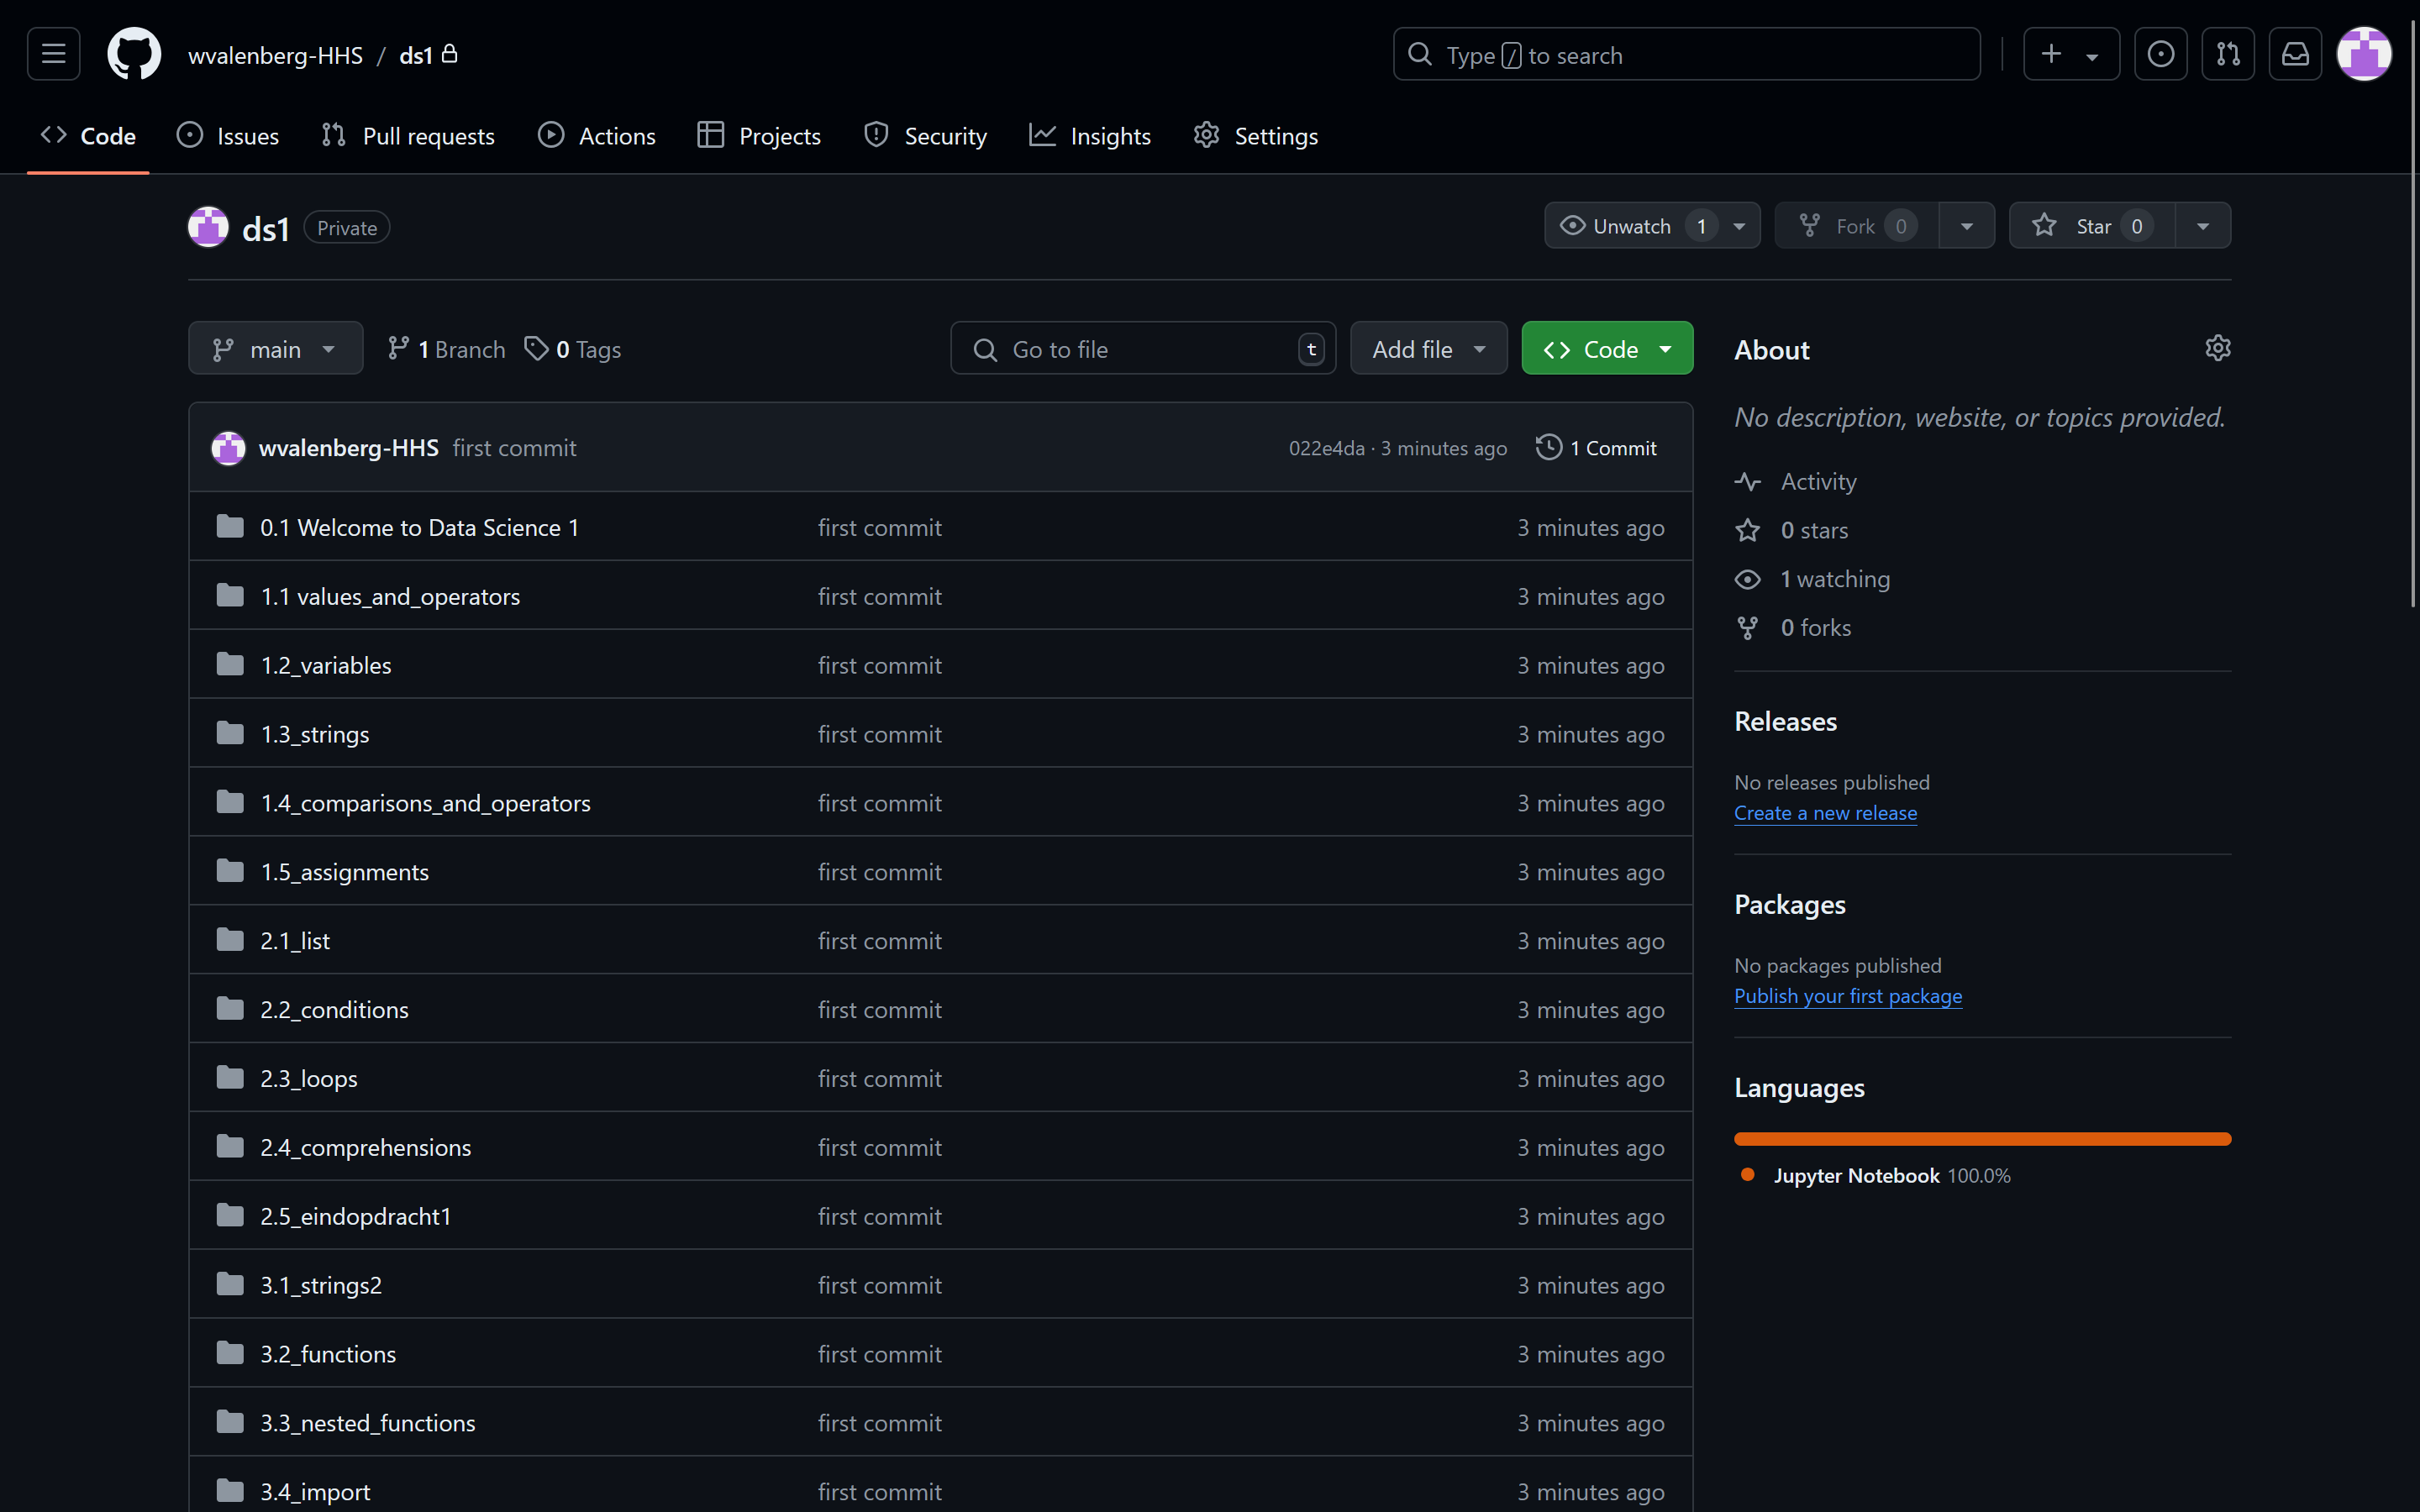

In [129]:
Image(data="/data/ds1/datasets/git_tutorial/github_repository_full.png") 

Now that you pushed a first backup to GitHub, you can from now on use the shortcut (cloud with arrow up) as shown in the below image.

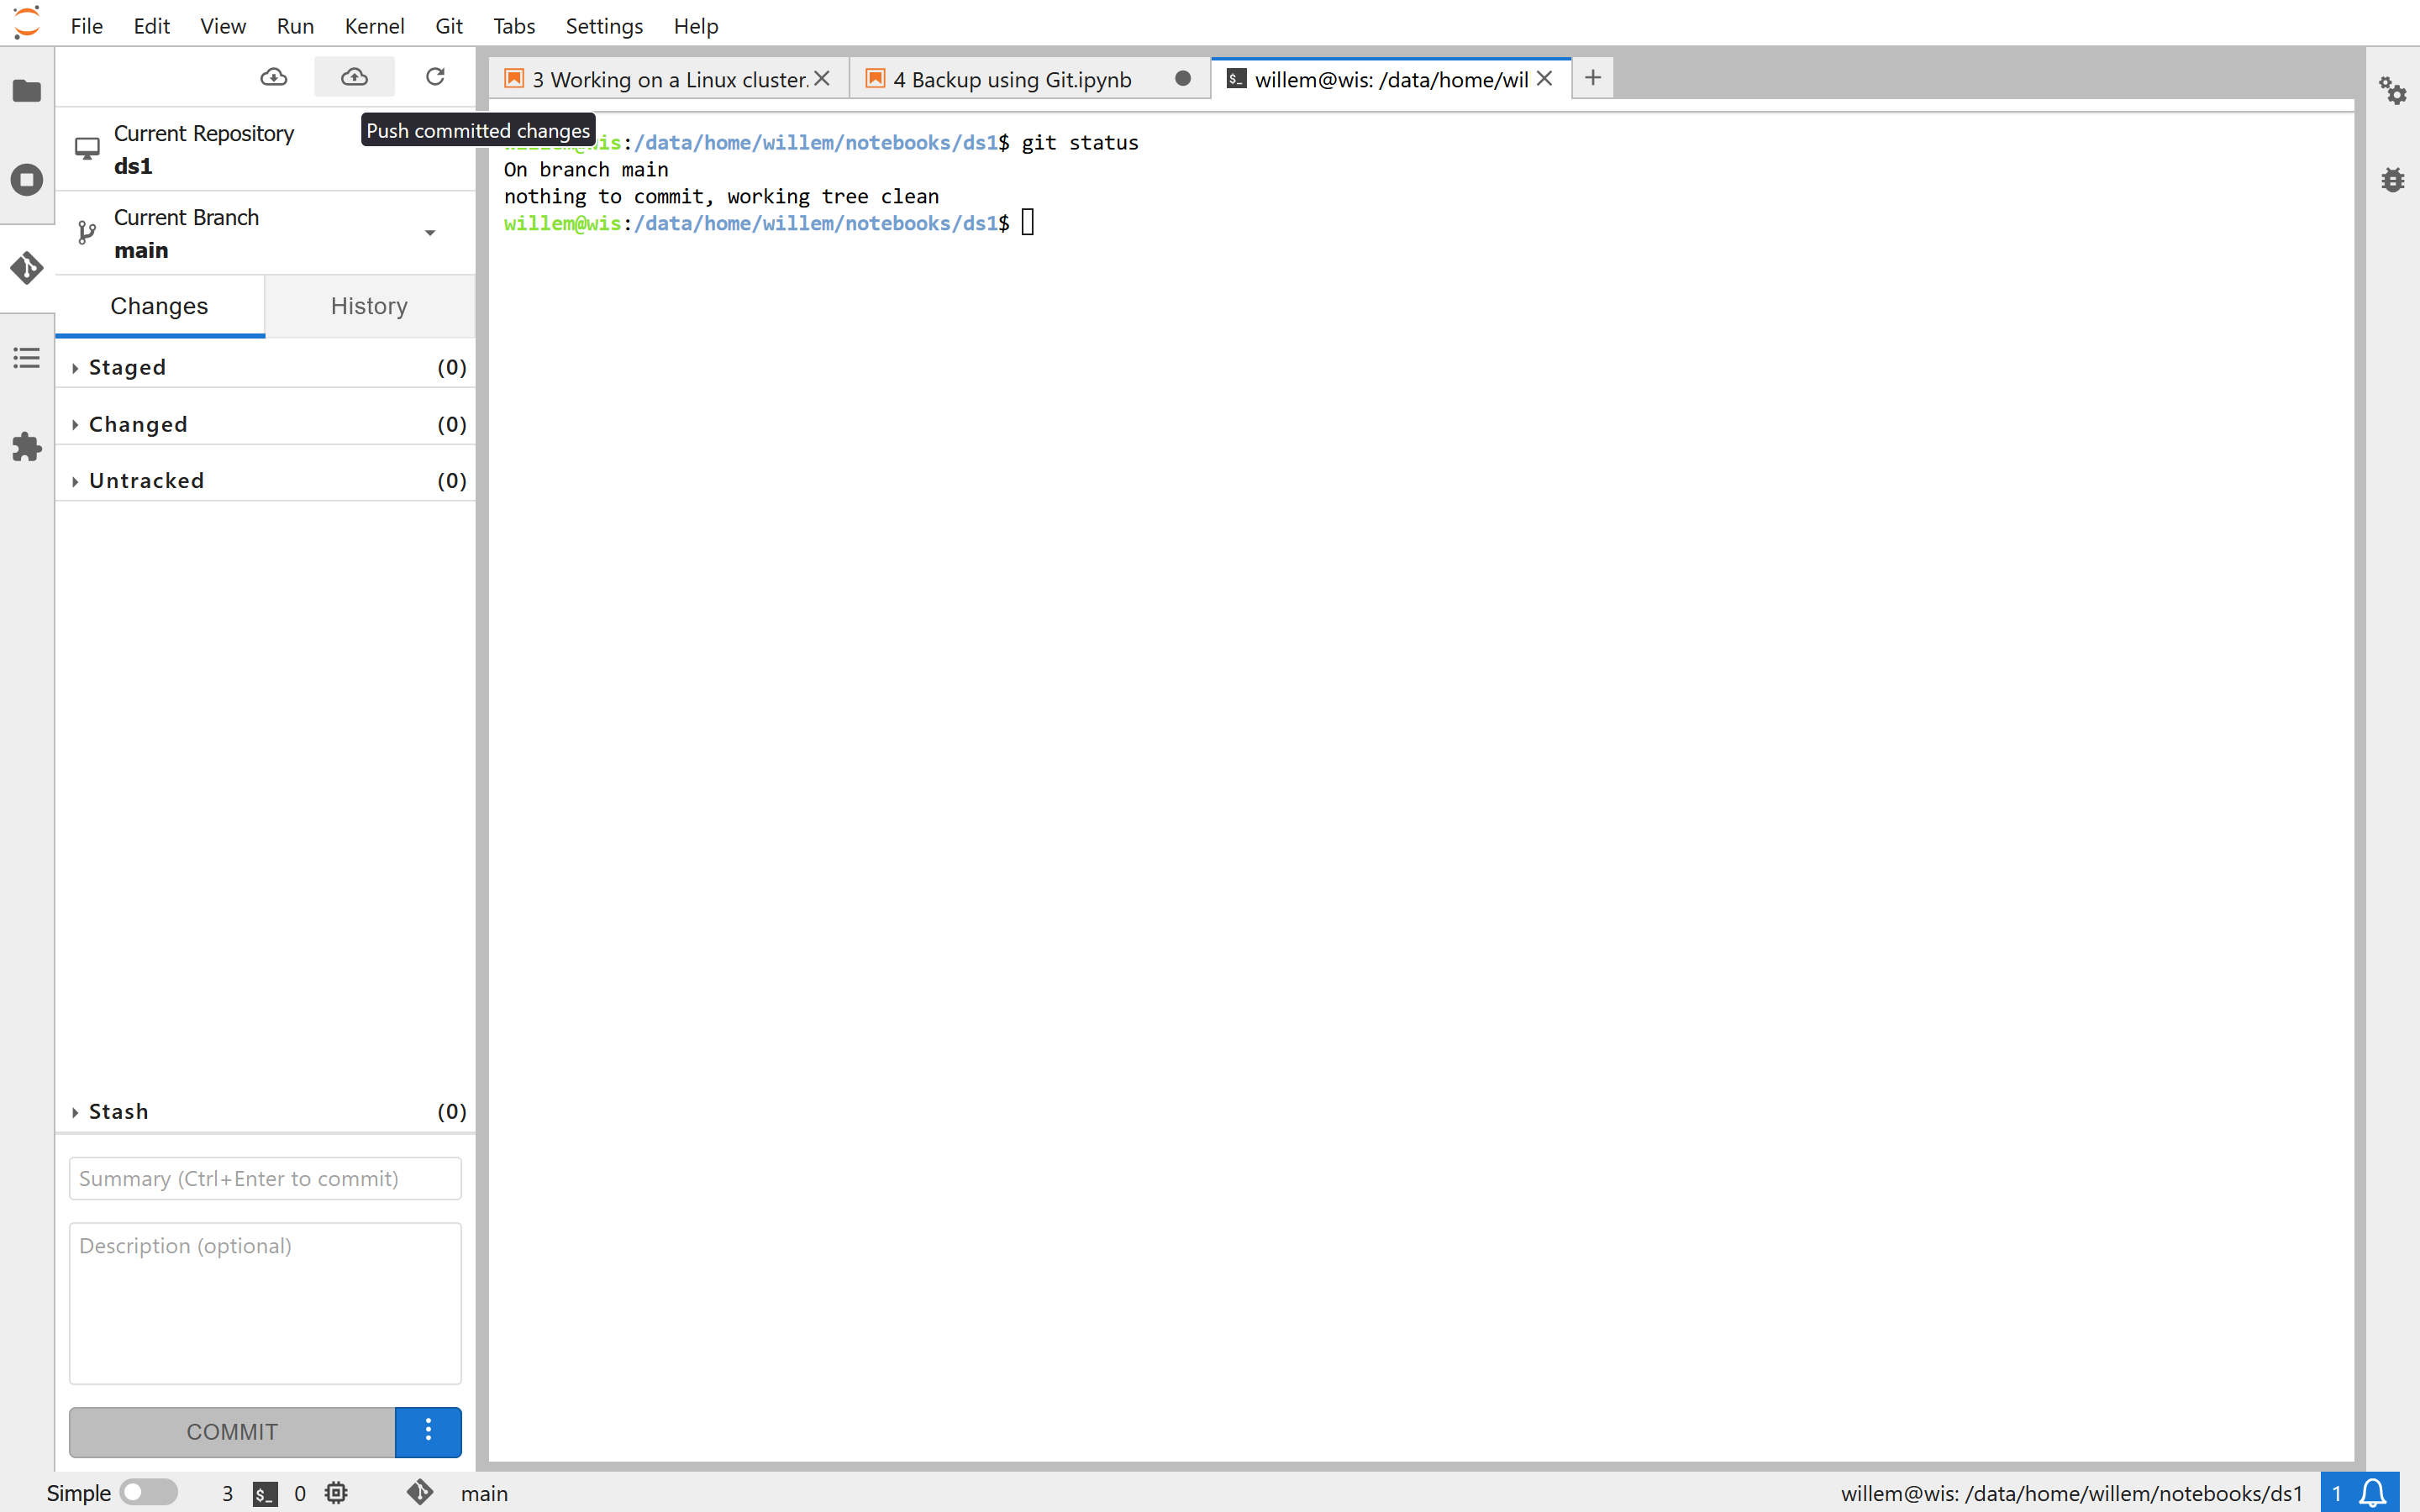

In [131]:
Image(data="/data/ds1/datasets/git_tutorial/git_push_easy.png") 

Now everything is setup to make backups! Create a backup after finishing each notebook excercise and before you take a break. It's best to get used to backing up your code often, since that will also be helpfull in the future when you work in a shared repository on GitHub.

We now only presented the basics of Git and GitHub that allow us to make backups, and there is still a lot of functionality that hasn't been discussed:
- you can jump between different versions of your code, which let's you remake results with older code versions.
- you can have different code branches, for instance a "stable" branch that you know works well and a "development" branch where you implement new features.
- as mentioned earlier, you can have a shared repository on GitHub and work on code in a team. This will be very useful for the project your working on, but is also more complex. Will explain this in week 13 when you start programming for Rondje Delft.